In [1]:
# this notebook attempts to combine datasets from various sources about country statistics
# Furthermore, the notebook also attempts to preprocess the data for forecasting

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read the various data files

# read the data about infections and deaths per country
data_corona = pd.read_excel("../data/COVID-19-geographic-disbtribution-worldwide-2020-03-17.xlsx")
data_corona = data_corona.rename(columns={'Countries and territories': 'country'})
print(data_corona.shape)
data_corona.head()

(5388, 8)


,DateRep,Day,Month,Year,Cases,Deaths,country,GeoId
0,2020-03-17,17,3,2020,5,0,Afghanistan,AF
1,2020-03-16,16,3,2020,6,0,Afghanistan,AF
2,2020-03-15,15,3,2020,3,0,Afghanistan,AF
3,2020-03-11,11,3,2020,3,0,Afghanistan,AF
4,2020-03-08,8,3,2020,3,0,Afghanistan,AF


In [4]:
# read the data about medical capacity per country
data_beds = pd.read_csv("../data/beds_per_country.csv")
data_beds = data_beds.rename(columns={'Country/territory': 'country'})
data_beds.head()

,Rank,country,Continent,2013,2014,2015,2016,2017,Actual,Proportional (%),Occupancy (%)[2],"ICU-CCB beds/100,000 inhabitants"
0,1,Japan,Asia,13.30,13.21,13.17,13.11,13.05,−0.06,−0.48,75.5,NaN
1,2,South Korea,Asia,10.92,11.59,11.61,11.98,12.27,0.34,2.85,NaN,NaN
2,3,Russia,Europe,9.07,8.81,8.35,8.16,8.05,−0.26,−3.04,NaN,NaN
3,4,Germany,Europe,8.28,8.23,8.13,8.06,8.00,−0.07,−0.86,79.8,29.2[3]
4,5,Austria,Europe,7.64,7.58,7.54,7.42,7.37,−0.07,−0.90,73.8,21.8[3]


In [5]:
# read the data about population by country
data_pop = pd.read_csv("../data/population_by_country.csv")
data_pop = data_pop.rename(columns={'Country (or dependent territory)': 'country'})
data_pop.head()

,Rank,country,Population,% of worldpopulation,Date,Source
0,1,China[b],"1,401,812,360",18.0%,18 Mar 2020,National population clock[3]
1,2,India,"1,359,933,123",17.5%,18 Mar 2020,National population clock[4]
2,3,United States[c],"329,470,935",4.24%,18 Mar 2020,National population clock[5]
3,4,Indonesia,"266,911,900",3.43%,1 Jul 2019,National annual projection[6]
4,5,Pakistan,"218,983,520",2.82%,18 Mar 2020,2017 census[7]


In [6]:
# read data about latitude and longitude of countries
data_latlong = pd.read_csv("../data/time_series_covid_19_confirmed.csv")
data_latlong = data_latlong[['Country/Region', 'Lat', 'Long']]
data_latlong = data_latlong.rename(columns={'Country/Region': 'country'})
print(data_latlong.shape)
data_latlong.head()

(442, 3)


,country,Lat,Long
0,Thailand,15.0000,101.0000
1,Japan,36.0000,138.0000
2,Singapore,1.2833,103.8333
3,Nepal,28.1667,84.2500
4,Malaysia,2.5000,112.5000


In [7]:
def number_to_cumsum(values):
    values = np.flip(np.cumsum(np.flip(values)))
    
    return values
    

In [8]:
# compute the running sum of the infections and deaths
"""for country in data_corona['Countries and territories'].unique():
    # get idx 
    idx_country = data_corona['Countries and territories'] == country
    data_corona.loc[idx_country, 'Cases'] = number_to_cumsum(data_corona['Cases'].loc[idx_country])
    data_corona.loc[idx_country, 'Deaths'] = number_to_cumsum(data_corona['Deaths'].loc[idx_country])
"""

"for country in data_corona['Countries and territories'].unique():\n    # get idx \n    idx_country = data_corona['Countries and territories'] == country\n    data_corona.loc[idx_country, 'Cases'] = number_to_cumsum(data_corona['Cases'].loc[idx_country])\n    data_corona.loc[idx_country, 'Deaths'] = number_to_cumsum(data_corona['Deaths'].loc[idx_country])\n"

In [9]:
# reverse the order based on date for each country
for country in data_corona['country'].unique():
    idx_country = data_corona['country'] == country
    # save indexes, such that the reversed dataset gets the correct indices
    index_original = data_corona.loc[idx_country].index
    data_corona_country_rev = data_corona.loc[idx_country][::-1]
    data_corona_country_rev.index = index_original
    data_corona.loc[idx_country] = data_corona_country_rev

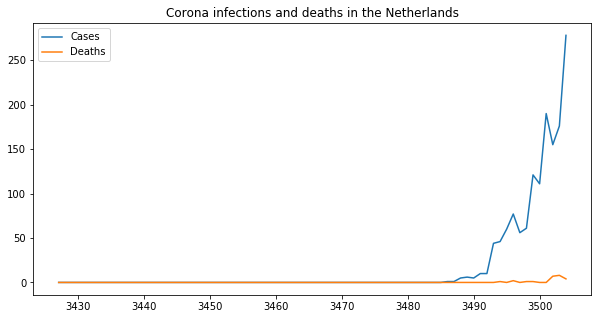

In [10]:
# plot the progression of infections and deaths
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10, 5)
data_corona[data_corona['country'] == "Netherlands"]['Cases'].plot(ax=ax)
data_corona[data_corona['country'] == "Netherlands"]['Deaths'].plot(ax=ax)
plt.title("Corona infections and deaths in the Netherlands")
plt.legend(['Cases', 'Deaths'])

In [ ]:
# identify the countries occurring in the hospital data


In [11]:
# merge latitude - longitude data with time series data
data_corona = pd.merge(data_corona, data_latlong, on='country')
print(data_corona.shape)
data_corona.head()

(8467, 10)


,DateRep,Day,Month,Year,Cases,Deaths,country,GeoId,Lat,Long
0,2019-12-31,31,12,2019,0,0,Afghanistan,AF,33.0,65.0
1,2020-01-01,1,1,2020,0,0,Afghanistan,AF,33.0,65.0
2,2020-01-02,2,1,2020,0,0,Afghanistan,AF,33.0,65.0
3,2020-01-03,3,1,2020,0,0,Afghanistan,AF,33.0,65.0
4,2020-01-04,4,1,2020,0,0,Afghanistan,AF,33.0,65.0
